## 様々なテクニカル指標で楽天の株価を可視化（2023年2月25日）

In [1]:
# モジュールのインポート
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

#### 楽天の株価を取得

In [13]:
start = '2003-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（20年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)

df = rakuten.copy()
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-01 00:00:00+09:00,90.400002,90.400002,90.400002,90.400002,85.559387,0
2003-01-02 00:00:00+09:00,90.400002,90.400002,90.400002,90.400002,85.559387,0
2003-01-03 00:00:00+09:00,90.400002,90.400002,90.400002,90.400002,85.559387,0
2003-01-06 00:00:00+09:00,91.500000,92.300003,90.400002,91.199997,86.316528,200000
2003-01-07 00:00:00+09:00,93.000000,93.000000,88.000000,88.599998,83.855766,300000
...,...,...,...,...,...,...
2023-02-10 00:00:00+09:00,660.000000,669.000000,658.000000,660.000000,660.000000,11303400
2023-02-13 00:00:00+09:00,658.000000,672.000000,652.000000,672.000000,672.000000,9910400
2023-02-14 00:00:00+09:00,673.000000,674.000000,657.000000,662.000000,662.000000,8220300


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4926 entries, 2003-01-06 00:00:00+09:00 to 2023-02-16 00:00:00+09:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4926 non-null   float64
 1   High       4926 non-null   float64
 2   Low        4926 non-null   float64
 3   Close      4926 non-null   float64
 4   Adj Close  4926 non-null   float64
 5   Volume     4926 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 269.4 KB


#### 移動平均線（Moving Average）

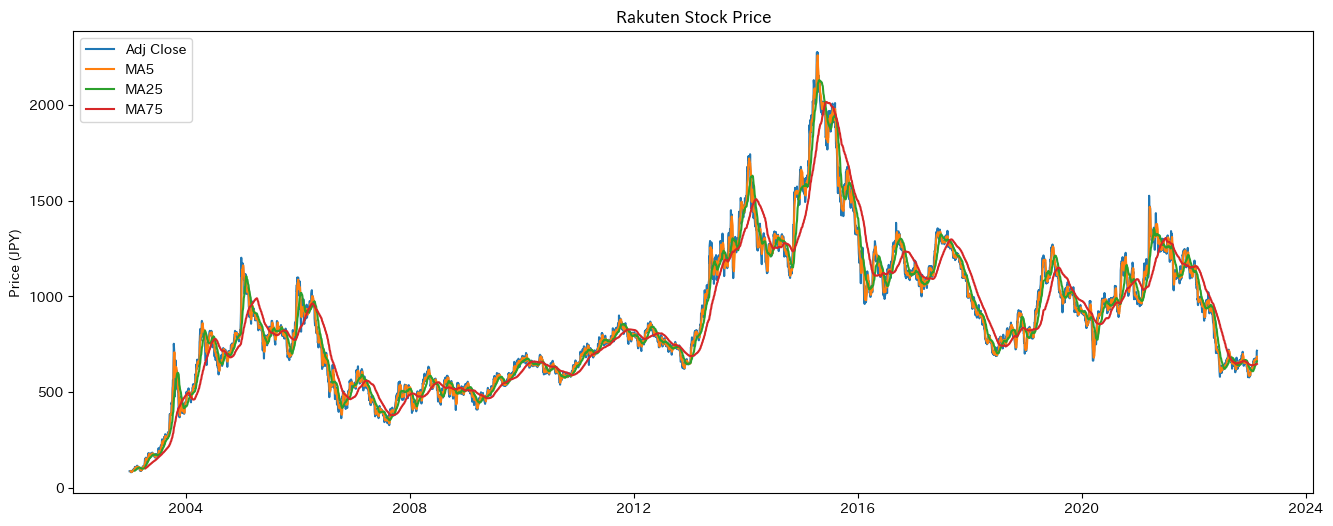

In [14]:
start = '2003-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（20年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# 移動平均線の期間
ma_period = [5, 25, 75]

# 移動平均線を計算
for p in ma_period:
    df['MA' + str(p)] = df['Adj Close'].rolling(window=p).mean()

# グラフを描画
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(df.index, df['Adj Close'], label='Adj Close')

for p in ma_period:
    ax.plot(df.index, df['MA' + str(p)], label='MA' + str(p))

ax.set(title='Rakuten Stock Price', ylabel='Price (JPY)')
ax.legend(loc='upper left')

plt.show()

#### 指数平滑平均線

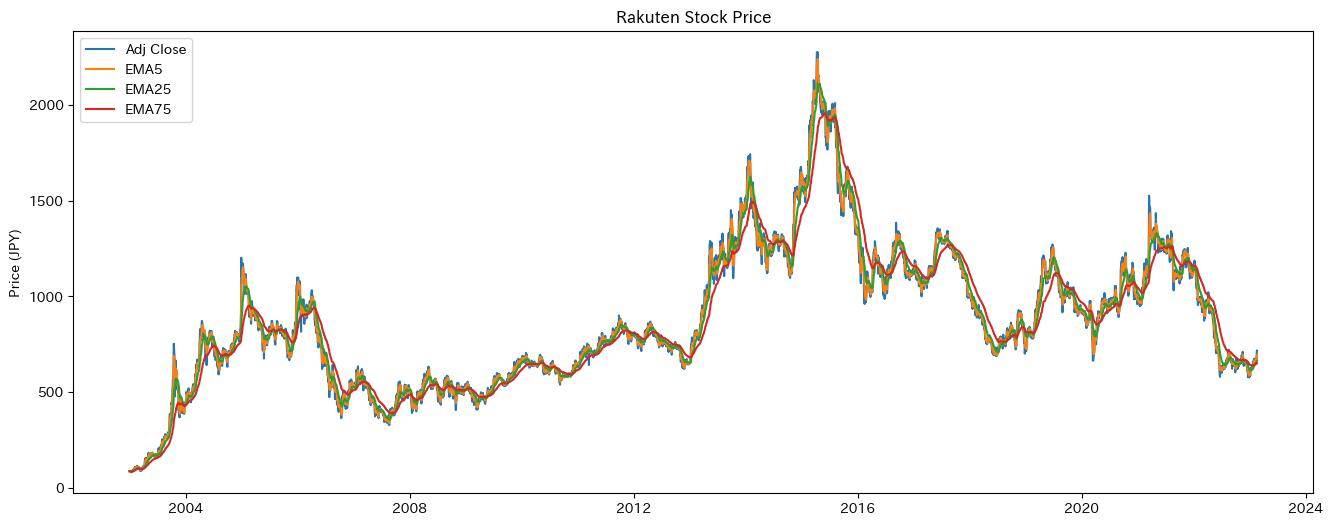

In [15]:
start = '2003-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（20年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# 指数平滑平均線の期間
ema_period = [5, 25, 75]

# 指数平滑平均線を計算
for p in ema_period:
    df['EMA' + str(p)] = df['Adj Close'].ewm(span=p).mean()

# グラフを描画
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(df.index, df['Adj Close'], label='Adj Close')

for p in ema_period:
    ax.plot(df.index, df['EMA' + str(p)], label='EMA' + str(p))

ax.set(title='Rakuten Stock Price', ylabel='Price (JPY)')
ax.legend(loc='upper left')

plt.show()

#### RSI(相対力指数)

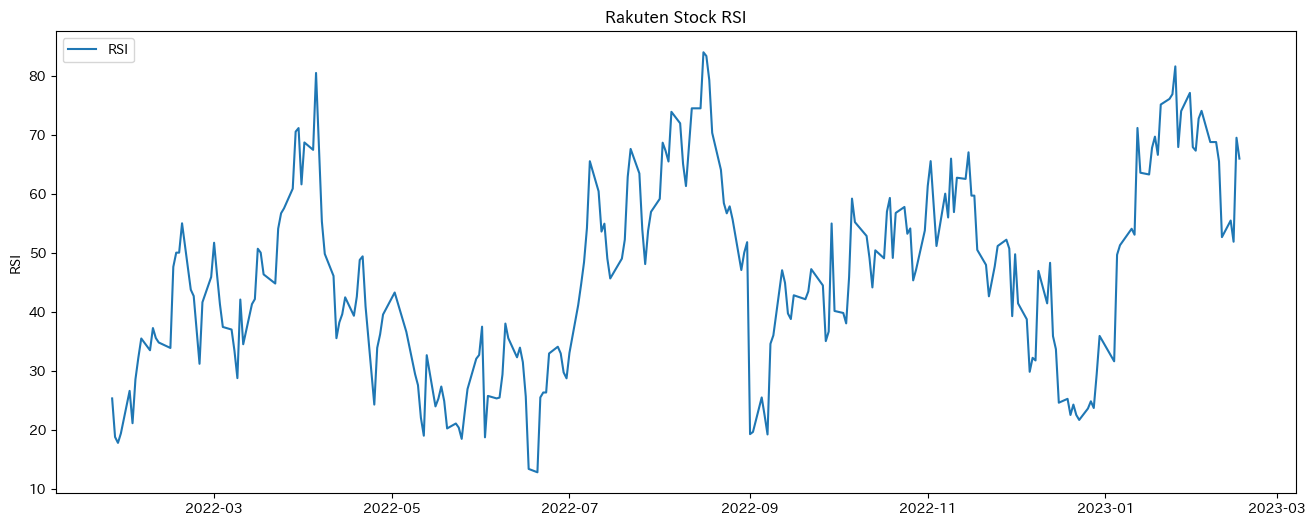

In [35]:
start = '2003-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（20年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# RSIを計算
delta = df['Adj Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# グラフを描画
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(df.index, df['RSI'], label='RSI')

ax.set(title='Rakuten Stock RSI', ylabel='RSI')
ax.legend(loc='upper left')

plt.show()

#### ボリンジャーバンド

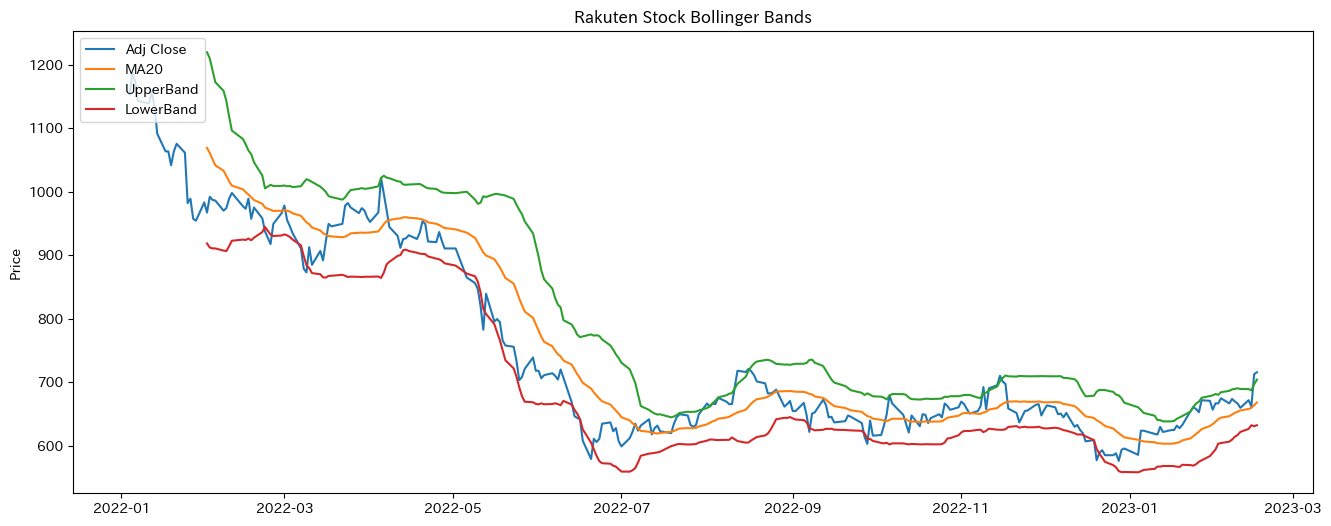

In [36]:
start = '2020-01-01'
end = '2023-02-17'

# データの読み込み
df = rakuten.copy()
# 20日移動平均線を計算
df['MA20'] = df['Adj Close'].rolling(window=20).mean()

# ボリンジャーバンドを計算
sigma = 2
df['STD'] = df['Adj Close'].rolling(window=20).std(ddof=0)
df['UpperBand'] = df['MA20'] + sigma * df['STD']
df['LowerBand'] = df['MA20'] - sigma * df['STD']

# グラフを描画
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(df.index, df['Adj Close'], label='Adj Close')
ax.plot(df.index, df['MA20'], label='MA20')
ax.plot(df.index, df['UpperBand'], label='UpperBand')
ax.plot(df.index, df['LowerBand'], label='LowerBand')

ax.set(title='Rakuten Stock Bollinger Bands', ylabel='Price')
ax.legend(loc='upper left')

plt.show()

#### RSI✖️ボリンジャーバンド

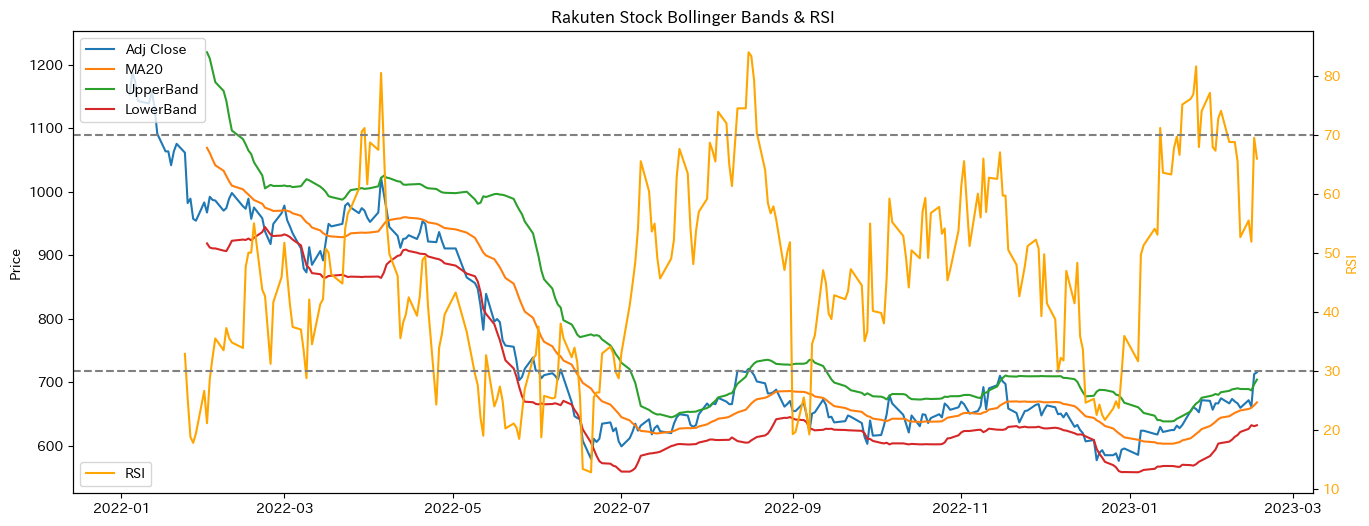

In [37]:
start = '2020-01-01'
end = '2023-02-17'

# データの読み込み
df = rakuten.copy()
# 20日移動平均線を計算
df['MA20'] = df['Adj Close'].rolling(window=20).mean()

# ボリンジャーバンドを計算
sigma = 2
df['STD'] = df['Adj Close'].rolling(window=20).std(ddof=0)
df['UpperBand'] = df['MA20'] + sigma * df['STD']
df['LowerBand'] = df['MA20'] - sigma * df['STD']

# 相対力指数(RSI)を計算
delta = df['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# グラフを描画
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(df.index, df['Adj Close'], label='Adj Close')
ax.plot(df.index, df['MA20'], label='MA20')
ax.plot(df.index, df['UpperBand'], label='UpperBand')
ax.plot(df.index, df['LowerBand'], label='LowerBand')
ax.legend(loc='upper left')

# 右側の軸にRSIを描画
ax2 = ax.twinx()
ax2.plot(df.index, df['RSI'], label='RSI', color='orange')
ax2.axhline(y=30, color='gray', linestyle='--')
ax2.axhline(y=70, color='gray', linestyle='--')
ax2.set_ylabel('RSI', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='lower left')

ax.set(title='Rakuten Stock Bollinger Bands & RSI', ylabel='Price')
plt.show()

#### ストキャスティクス

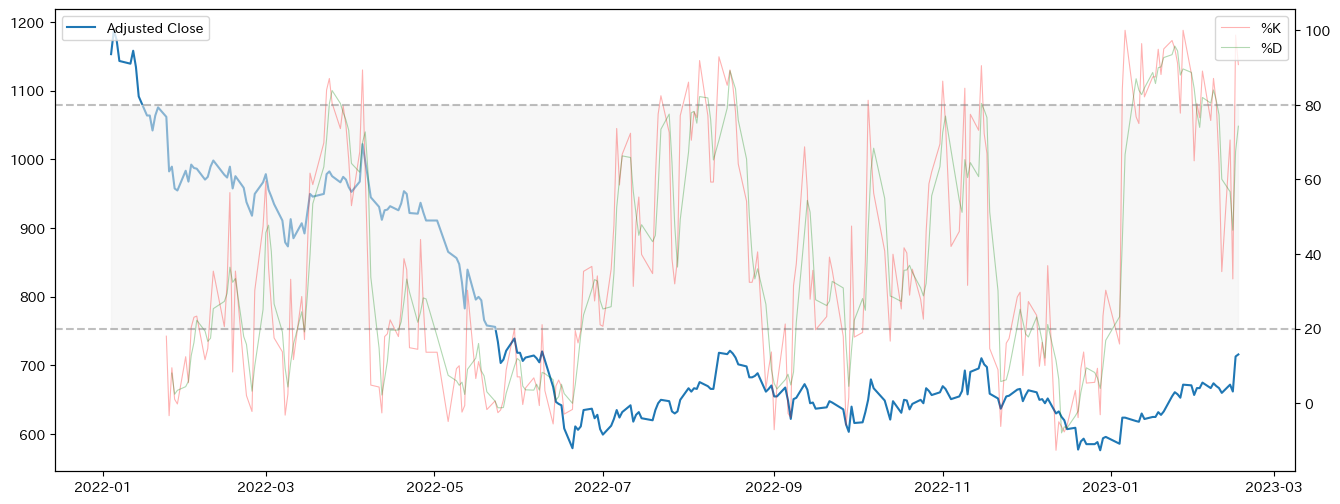

In [38]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# ストキャスティクスを計算する
k_period = 14  # K期間
d_period = 3   # D期間
df['l14'] = df['Low'].rolling(window=k_period).min()  # 最低価格の14期間移動平均
df['h14'] = df['High'].rolling(window=k_period).max()  # 最高価格の14期間移動平均
df['%K'] = (df['Adj Close'] - df['l14']) / (df['h14'] - df['l14']) * 100  # %Kの計算
df['%D'] = df['%K'].rolling(window=d_period).mean()  # %Dの計算

# グラフを描く
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(df.index, df['Adj Close'], label='Adjusted Close')
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(df.index, df['%K'], label='%K', color='red', alpha=0.3, linewidth=0.8)
ax2.plot(df.index, df['%D'], label='%D', color='green', alpha=0.3,linewidth=0.8)
ax2.axhline(y=80, linestyle='--', color='gray', alpha=0.5)
ax2.axhline(y=20, linestyle='--', color='gray', alpha=0.5)
ax2.fill_between(df.index, y1=80, y2=20, color='#f0f0f0', alpha=0.5)
ax2.legend(loc='upper right')

plt.show()

#### ファースト・ストキャスティクス

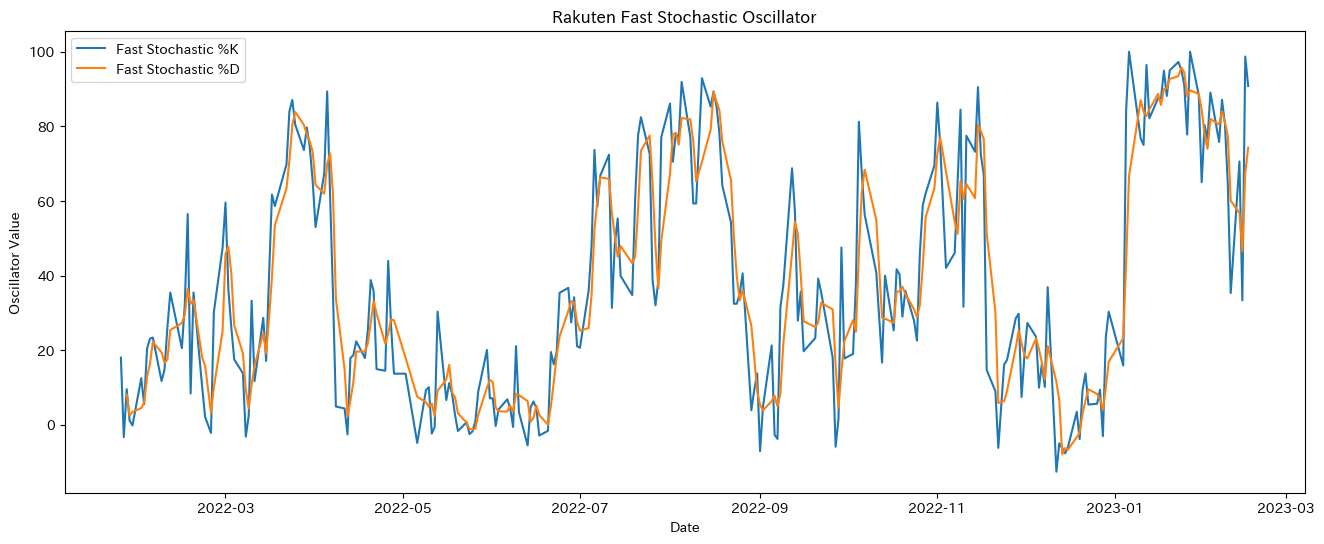

In [39]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# ファースト・ストキャスティクスを計算
high = df['High'].rolling(window=14).max()# 最低価格の14期間移動平均
low = df['Low'].rolling(window=14).min()# 最高価格の14期間移動平均
k = 100 * (df['Adj Close'] - low) / (high - low)
d = k.rolling(window=3).mean()

# プロット
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(df.index, k, label='Fast Stochastic %K')
ax.plot(df.index, d, label='Fast Stochastic %D')

# グラフの表示設定
ax.set_title('Rakuten Fast Stochastic Oscillator')
ax.set_xlabel('Date')
ax.set_ylabel('Oscillator Value')
ax.legend()
plt.show()

#### MACD

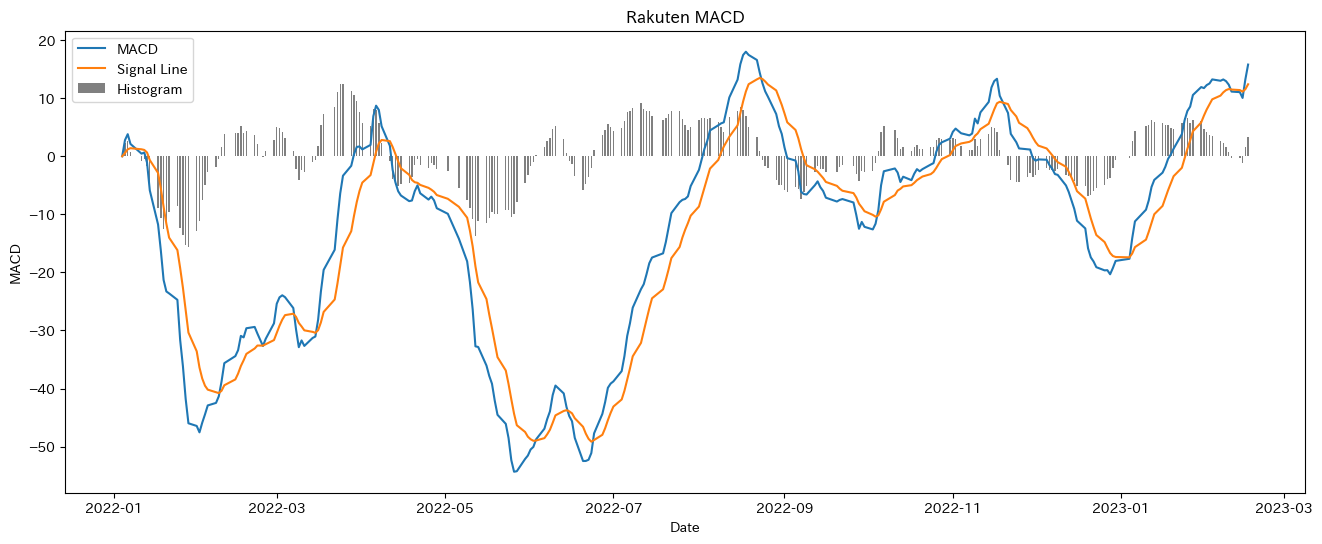

In [40]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# MACDを計算
ema_12 = df['Adj Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Adj Close'].ewm(span=26, adjust=False).mean()
macd = ema_12 - ema_26
signal = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

# プロット
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(df.index, macd, label='MACD')
ax.plot(df.index, signal, label='Signal Line')
ax.bar(df.index, histogram, width=0.5, label='Histogram', color='gray')

# グラフの表示設定
ax.set_title('Rakuten MACD')
ax.set_xlabel('Date')
ax.set_ylabel('MACD')
ax.legend()
plt.show()

#### 指数平滑移動平均線✖️MACD

EMAが価格よりも上にある場合、価格は上昇トレンドにあり、EMAが価格よりも下にある場合、価格は下降トレンドにあります。<br>
MACDがゼロラインを上回った場合、上昇トレンドが確認され、MACDがゼロラインを下回った場合、下降トレンドが確認されます。<br>
指数平滑移動平均線とMACDを併用することで、トレンドの転換を予測することができます。<br>
EMAとMACDを組み合わせることで、より高い精度でトレンド転換を予測することができます。<br>
たとえば、EMAが価格よりも上にあり、MACDがゼロラインを上回った場合、強い上昇トレンドが確認されます。逆に、EMAが価格よりも下にあり、MACDがゼロラインを下回った場合、強い下降トレンドが確認されます。

[*********************100%***********************]  1 of 1 completed


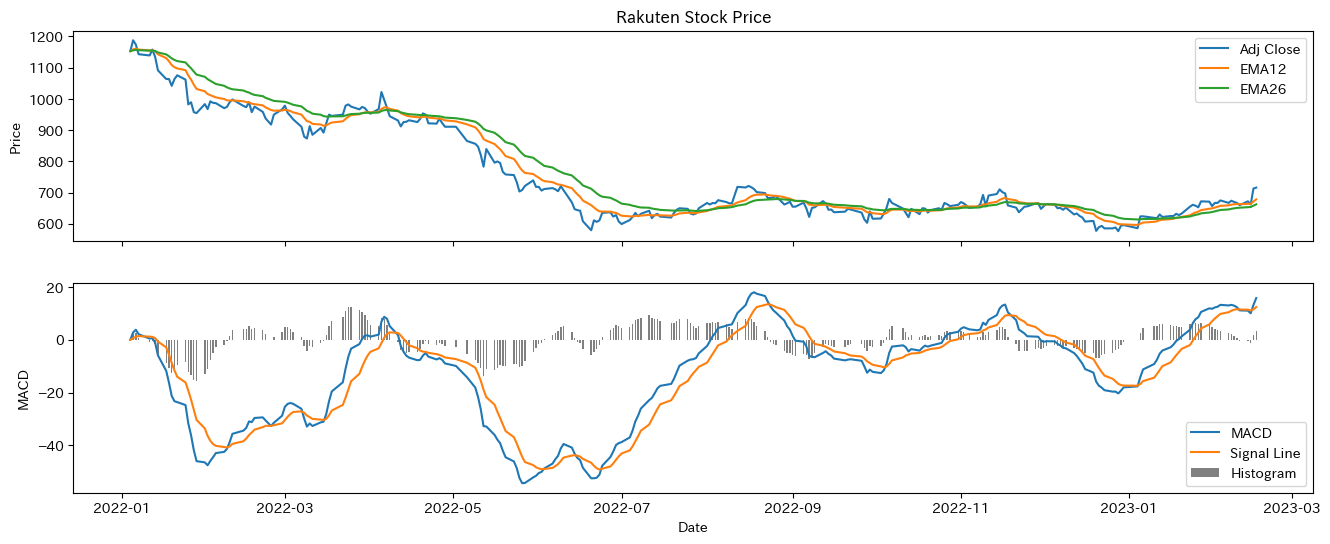

In [24]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# 指数平滑移動平均線を計算
ema_12 = df['Adj Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['Adj Close'].ewm(span=26, adjust=False).mean()

# MACDを計算
macd = ema_12 - ema_26
signal = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

# プロット
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

# 上部に指数平滑移動平均線を描画
ax1.plot(df.index, rakuten['Adj Close'], label='Adj Close')
ax1.plot(df.index, ema_12, label='EMA12')
ax1.plot(df.index, ema_26, label='EMA26')
ax1.legend()

# 下部にMACDを描画
ax2.plot(df.index, macd, label='MACD')
ax2.plot(df.index, signal, label='Signal Line')
ax2.bar(df.index, histogram, width=0.5, label='Histogram', color='gray')
ax2.legend()

# グラフの表示設定
ax1.set_title('Rakuten Stock Price')
ax2.set_xlabel('Date')
ax1.set_ylabel('Price')
ax2.set_ylabel('MACD')
plt.show()

#### RSI✖️MACD

RSIは、過去の値動きを基に、株価が過買いか過売りかを示す指標です。<br>
RSIは、一定期間（通常は14日間）の上昇期間と下降期間の平均を算出し、その比率を示すことで、過去の値動きの勢いを表します。<br>
- RSIの値が70を超えると、過買いとされ、価格が下落する可能性があります。
- 一方、RSIの値が30を下回ると、過売りとされ、価格が上昇する可能性があります。

MACDは、異なる期間の移動平均線の差を計算し、その差の移動平均線を取ることで、トレンドの転換を示す指標です。<br>
MACDの値がゼロよりも大きくなると、上昇トレンドが始まる可能性があります。<br>
一方、MACDの値がゼロよりも小さくなると、下降トレンドが始まる可能性があります。

RSIとMACDは、それぞれ独自の指標であるため、相互に関係しているというわけではありません。<br>
ただし、トレンドの転換について考えるときに、RSIとMACDを併用することがあります。<br>
たとえば、**MACDがゼロよりも大きくなって上昇トレンドが始まった場合(ゴールデンクロス)、RSIが70を超えて過買いとなった場合には、相場がオーバーヒートしていると判断ができます**。<br>
逆に、**MACDがゼロよりも小さくなって下降トレンドが始まった場合(デッドクロス)、RSIが30を下回って過売りとなった場合には、相場が下落しすぎていると判断しができます**。

[*********************100%***********************]  1 of 1 completed


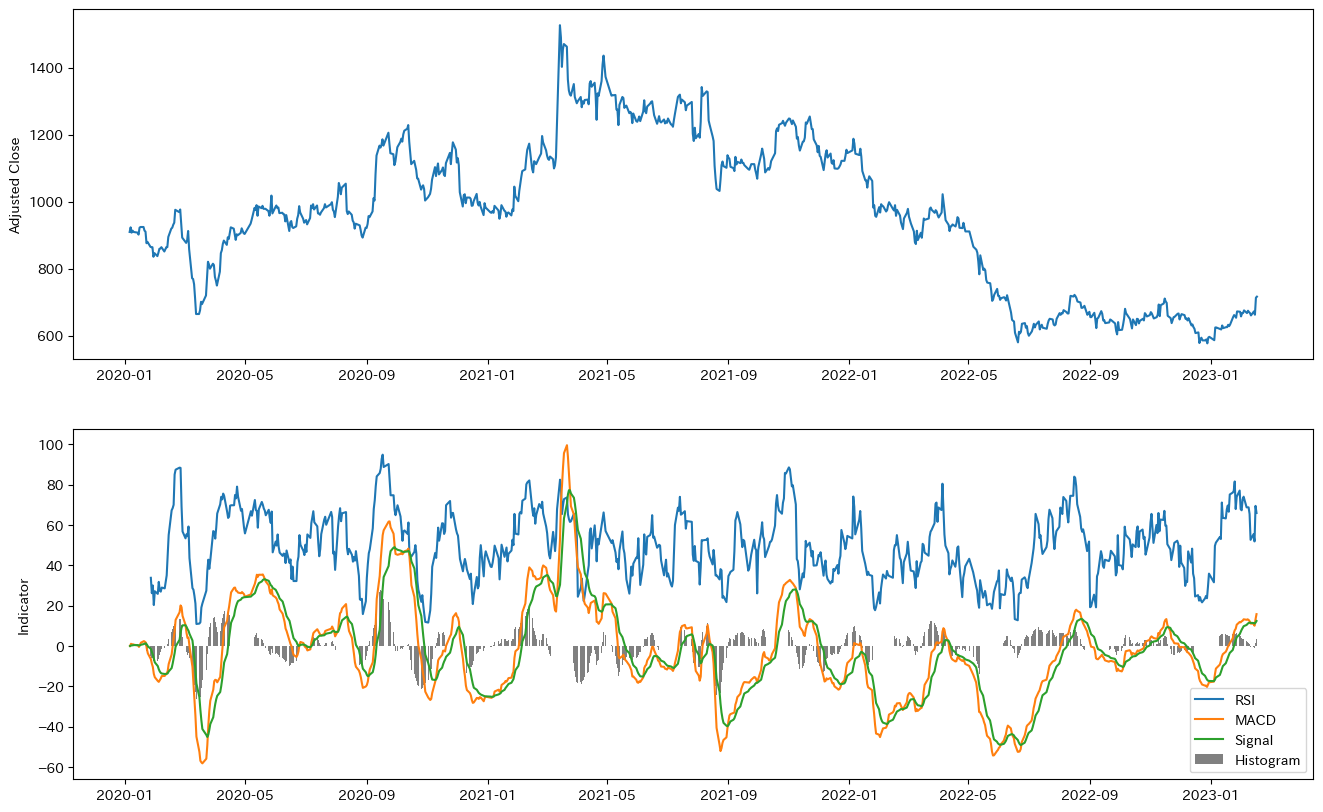

In [45]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# RSIを計算する関数を定義
def calc_rsi(data, window):
    delta = data.diff()
    ups, downs = delta.copy(), delta.copy()
    ups[ups < 0] = 0
    downs[downs > 0] = 0
    rs_up = ups.rolling(window).mean()
    rs_down = downs.abs().rolling(window).mean()
    rsi = 100 - 100 / (1 + rs_up / rs_down)
    return rsi

# MACDを計算する関数を定義
def calc_macd(data, fast_window, slow_window, signal_window):
    exp1 = data.ewm(span=fast_window, adjust=False).mean()
    exp2 = data.ewm(span=slow_window, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=signal_window, adjust=False).mean()
    hist = macd - signal
    return macd, signal, hist

# RSIを計算
rsi = calc_rsi(df['Adj Close'], 14)

# MACDを計算
macd, signal, hist = calc_macd(df['Adj Close'], 12, 26, 9)

# グラフを描画
fig, axs = plt.subplots(nrows=2, figsize=(16,10))
# 調整済み価格を描写
axs[0].plot(df['Adj Close'])
axs[0].set_ylabel('Adjusted Close')
# RSIとMACDを描写
axs[1].plot(rsi, label='RSI')
axs[1].plot(macd, label='MACD')
axs[1].plot(signal, label='Signal')
axs[1].bar(hist.index, hist, color='gray', label='Histogram')
axs[1].set_ylabel('Indicator')
axs[1].legend()
plt.show()

#### SAR

[*********************100%***********************]  1 of 1 completed


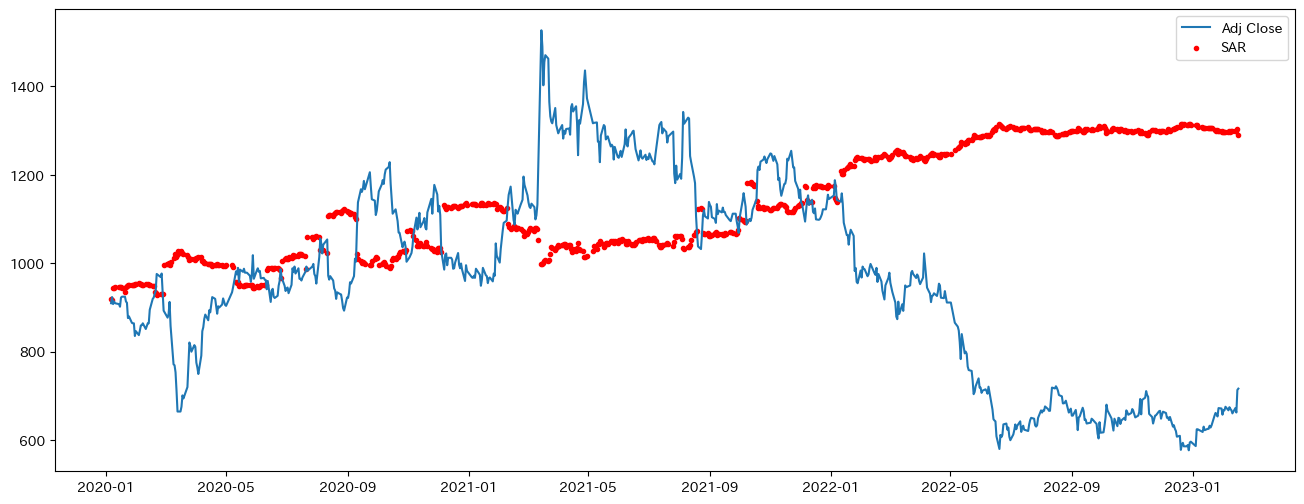

In [46]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# SARを計算
af = 0.02
af_max = 0.2
af_increase = 0.02
ep = []
hp = []
lp = []
direction = []
sar = []

for i in range(len(df)):
    if i == 0:
        ep.append(df['High'][i])
        hp.append(df['High'][i])
        lp.append(df['Low'][i])
        direction.append(1)
        sar.append(df['Low'][i])
    else:
        if direction[i-1] == 1:
            if df['Low'][i] < sar[i-1]:
                ep.append(df['Low'][i])
                hp.append(max(hp[i-1], df['High'][i]))
                lp.append(df['Low'][i])
                direction.append(-1)
                sar.append(hp[i] + af*(hp[i] - lp[i]))
                af = min(af + af_increase, af_max)
            else:
                ep.append(df['High'][i])
                hp.append(df['High'][i])
                lp.append(min(lp[i-1], df['Low'][i]))
                direction.append(1)
                sar.append(lp[i] - af*(hp[i] - lp[i]))
        else:
            if df['High'][i] > sar[i-1]:
                ep.append(df['High'][i])
                hp.append(df['High'][i])
                lp.append(df['Low'][i])
                direction.append(1)
                sar.append(lp[i] - af*(hp[i] - lp[i]))
                af = min(af + af_increase, af_max)
            else:
                ep.append(df['Low'][i])
                hp.append(max(hp[i-1], df['High'][i]))
                lp.append(df['Low'][i])
                direction.append(-1)
                sar.append(hp[i] + af*(hp[i] - lp[i]))

# グラフを描画
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df.index, df['Adj Close'], label='Adj Close')
ax.scatter(df.index, sar, marker='.', color='red', label='SAR')
ax.legend()
plt.show()

#### ADX

[*********************100%***********************]  1 of 1 completed


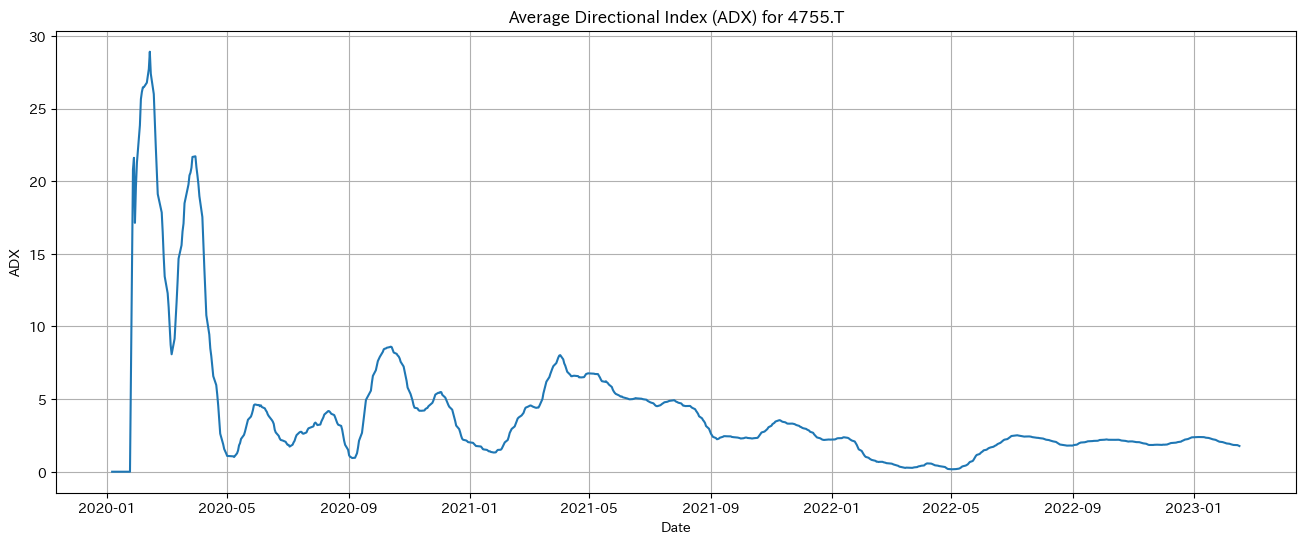

In [47]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# 前日終値からの変化率
delta = np.diff(df["Adj Close"])
delta = np.insert(delta, 0, 0)

# プラス方向の移動幅
up = np.where(delta > 0, delta, 0)

# マイナス方向の移動幅
down = np.where(delta < 0, -delta, 0)

# 14日間のトゥルーレンジの計算
tr = np.maximum(np.maximum(df["High"] - df["Low"], np.abs(df["High"] - df["Adj Close"].shift())), np.abs(df["Low"] - df["Adj Close"].shift()))

# 14日間のプラス方向指数（+DI）とマイナス方向指数（-DI）の計算
plus_di = 100 * np.cumsum(up) / np.cumsum(tr)
minus_di = 100 * np.cumsum(down) / np.cumsum(tr)

# DXの計算
dx = 100 * np.abs(plus_di - minus_di) / (plus_di + minus_di)

# ADXの計算
adx = np.zeros_like(dx)
for i in range(14, len(dx)):
    adx[i] = np.mean(dx[i-14:i+1])

# グラフのプロット
plt.figure(figsize=(16, 6))
plt.plot(df.index, adx)
plt.title("Average Directional Index (ADX) for {}".format(ticker))
plt.xlabel("Date")
plt.ylabel("ADX")
plt.grid(True)
plt.show()

#### RSIスムージング

[*********************100%***********************]  1 of 1 completed


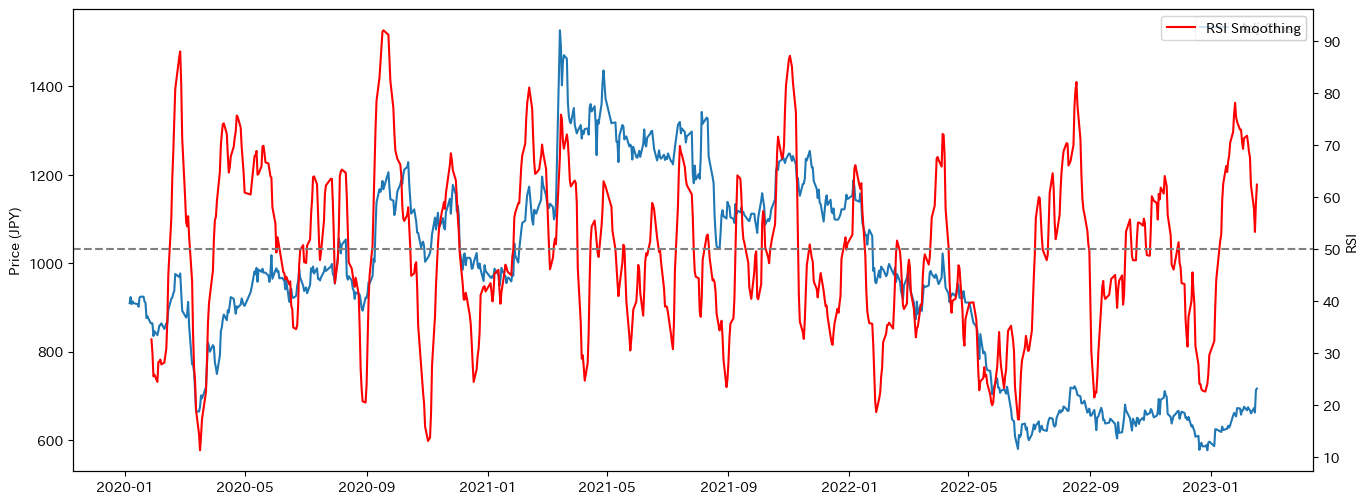

In [48]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# RSIの計算
n = 14
delta = df['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(n).mean()
avg_loss = loss.rolling(n).mean()
rs = avg_gain / avg_loss.abs()
rsi = 100 - (100 / (1 + rs))

# RSIのスムージング
n = 3
rsi_s = rsi.rolling(n).mean()

# プロット
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df.index, df['Adj Close'], label='Adj Close')
ax.set_ylabel('Price (JPY)')

ax2 = ax.twinx()
ax2.plot(rsi_s.index, rsi_s, label='RSI Smoothing', color='red')
ax2.axhline(y=50, color='gray', linestyle='--')
ax2.set_ylabel('RSI')

ax.legend()
ax2.legend(loc='upper right')
plt.show()

#### オシレーター

オシレーターとは、価格や指標の変化の強さや速さを示すテクニカル指標のことです。ここではRSIとストキャスティクスを描く方法を紹介します。

[*********************100%***********************]  1 of 1 completed


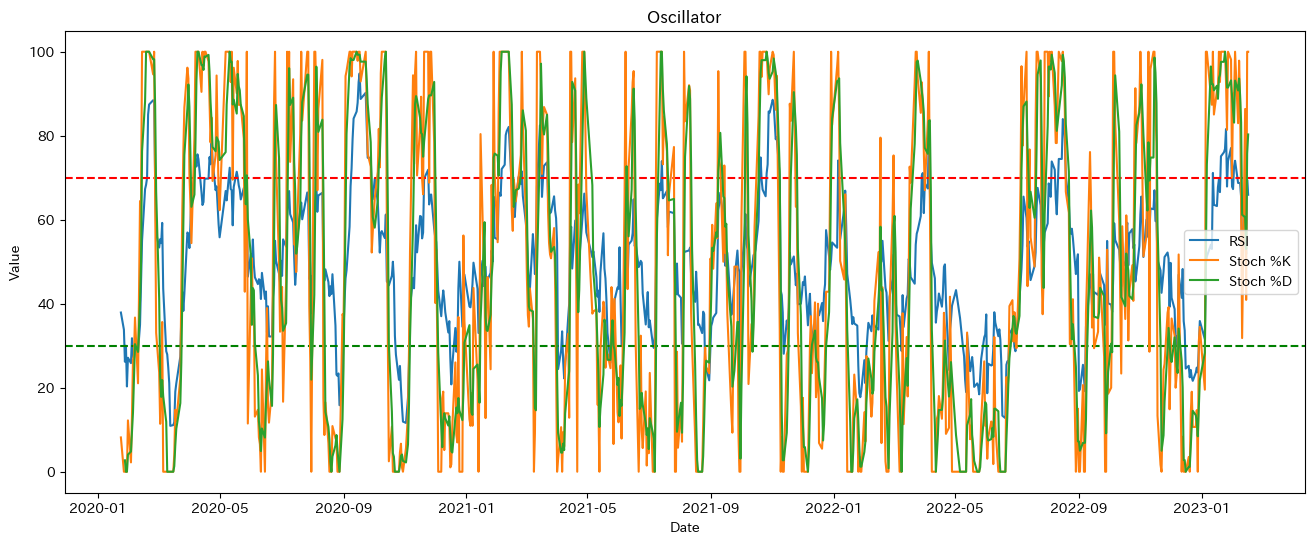

In [49]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# 調整済み終値を使ってRSIを計算する
delta = df['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean().abs()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# ストキャスティクスを計算する
n = 14
high = df['Adj Close'].rolling(window=n).max()
low = df['Adj Close'].rolling(window=n).min()
stoch_k = 100 * (df['Adj Close'] - low) / (high - low)
stoch_d = stoch_k.rolling(window=3).mean()

# オシレーターを描く
fig, ax = plt.subplots(figsize=(16, 6))

# RSI
ax.plot(df.index, rsi, label='RSI')
ax.axhline(y=70, color='r', linestyle='--')
ax.axhline(y=30, color='g', linestyle='--')

# ストキャスティクス
ax.plot(df.index, stoch_k, label='Stoch %K')
ax.plot(df.index, stoch_d, label='Stoch %D')

# 軸ラベルとタイトル
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Oscillator')

# 凡例を表示
ax.legend()

plt.show()

上記のコードでは、調整済み終値を使ってRSIを計算し、14期間のストキャスティクスを計算しています。そして、それらをプロットしています。<br>
RSIは70と30の水平線を引き、ストキャスティクスは%Kと%Dの2つの線をプロットしています。これらの水平線や線は、過買いや過売りのラインとして使用されます。

#### モメンタム

[*********************100%***********************]  1 of 1 completed


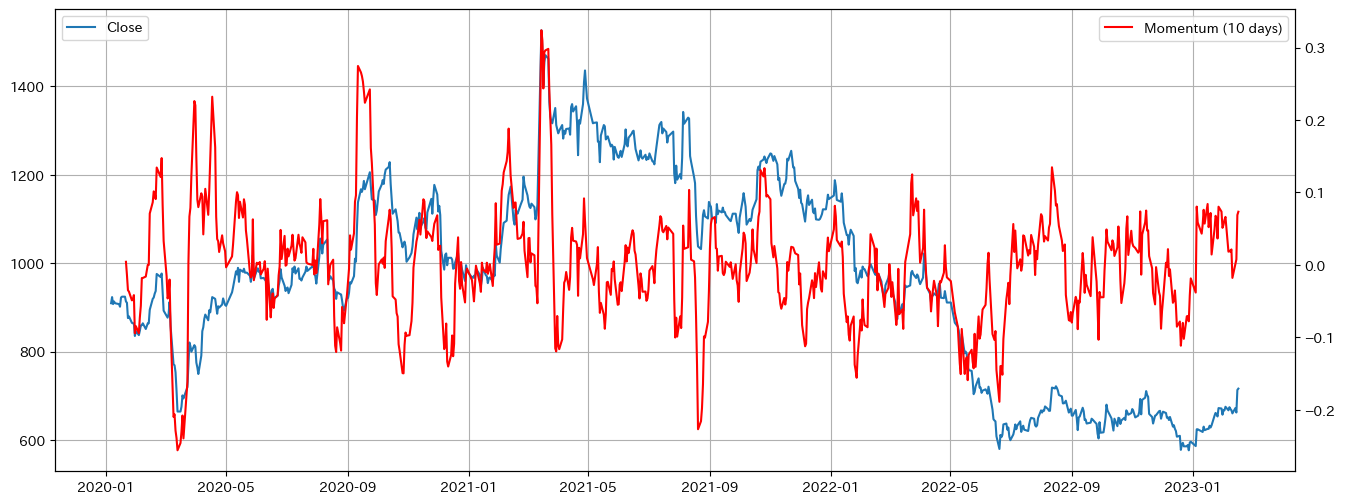

In [50]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()


# モメンタムを計算
n = 10  # モメンタム期間
momentum = df['Adj Close'].pct_change(n)

# グラフを描画
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df['Adj Close'].index, df['Adj Close'], label='Close')
ax2 = ax.twinx()
ax2.plot(momentum.index, momentum, color='red', label=f'Momentum ({n} days)')
ax.grid()
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

#### エントロピー

[*********************100%***********************]  1 of 1 completed


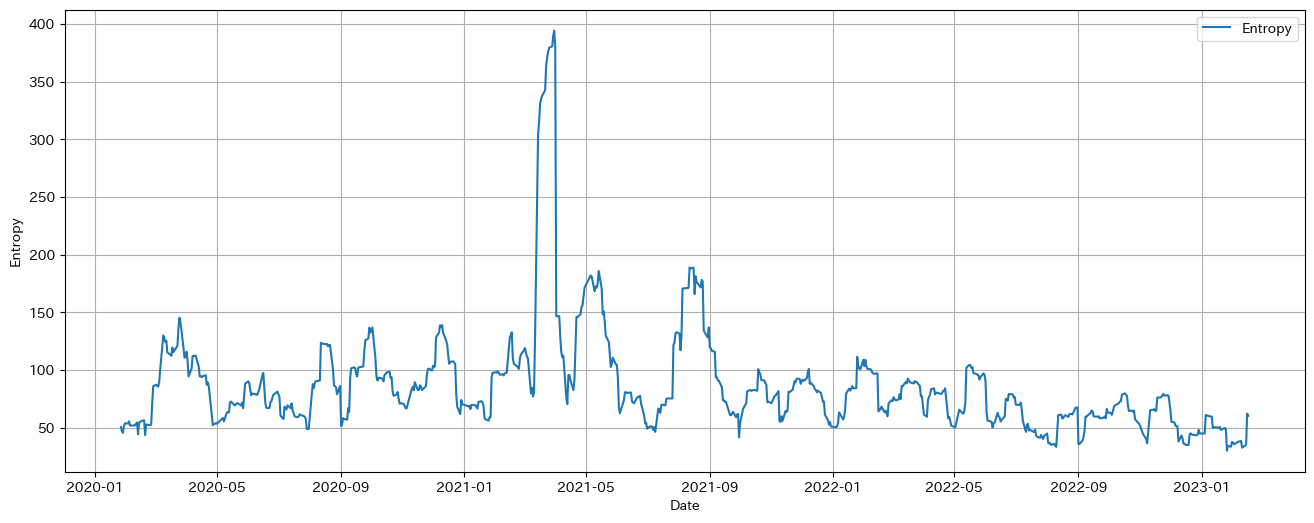

In [53]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# 関数の定義
def entropy(data, window=14):
    # 移動平均
    ma = df['Adj Close'].rolling(window=window).mean()
    # 株価データの差分
    diff = df['Adj Close'].diff()
    # 変化率
    rate = diff / df['Adj Close'].shift(1)
    # ボラティリティ
    volatility = rate.rolling(window=window).std() * np.sqrt(window)
    # エントロピー
    entropy = ma * volatility
    return entropy

# エントロピーの計算
ent = entropy(df)

# グラフの描画
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(ent.index, ent.values, label='Entropy')
ax.set_xlabel('Date')
ax.set_ylabel('Entropy')
ax.legend(loc='best')
ax.grid(True)
plt.show()

#### スプレッド

[*********************100%***********************]  1 of 1 completed


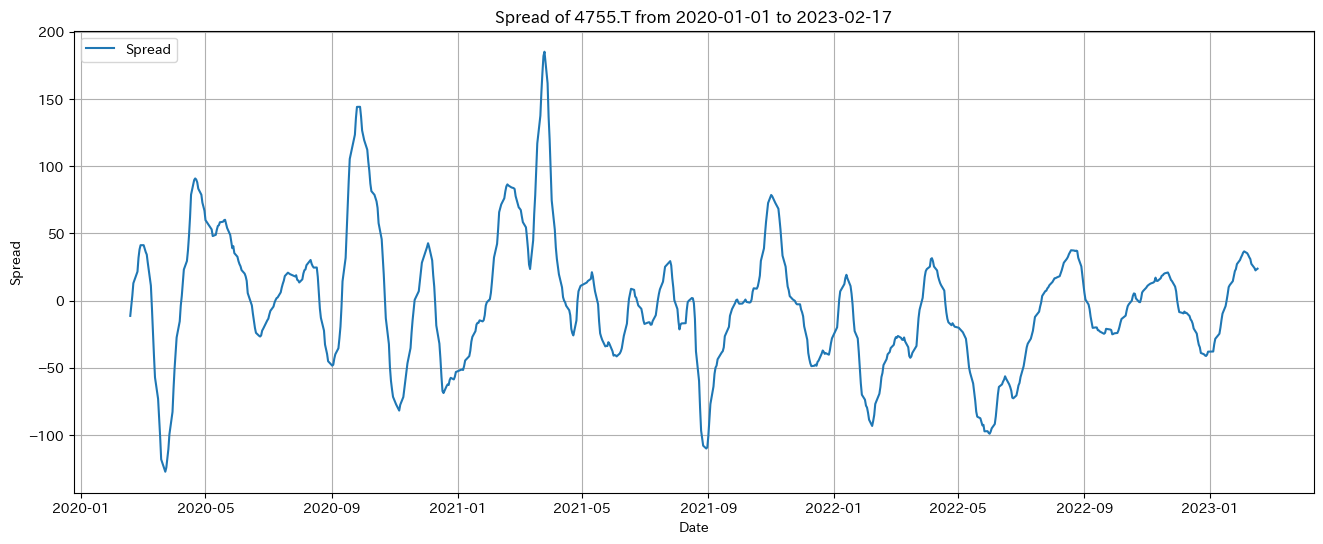

In [54]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# スプレッドを計算する関数を作成
def calculate_spread(df, short_period=10, long_period=30):
    # 短期間と長期間の移動平均を計算
    short_ma = df['Adj Close'].rolling(window=short_period).mean()
    long_ma = df['Adj Close'].rolling(window=long_period).mean()
    
    # スプレッドを計算
    spread = short_ma - long_ma
    
    return spread

# スプレッドを計算
spread = calculate_spread(df)

# スプレッドをプロット
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(spread.index, spread.values, label='Spread')
ax.grid(True)
ax.legend(loc='upper left')
ax.set_ylabel('Spread')
ax.set_xlabel('Date')
ax.set_title('Spread of {} from {} to {}'.format(ticker, start, end))

plt.show()

ヘッドアンドショルダー

[*********************100%***********************]  1 of 1 completed


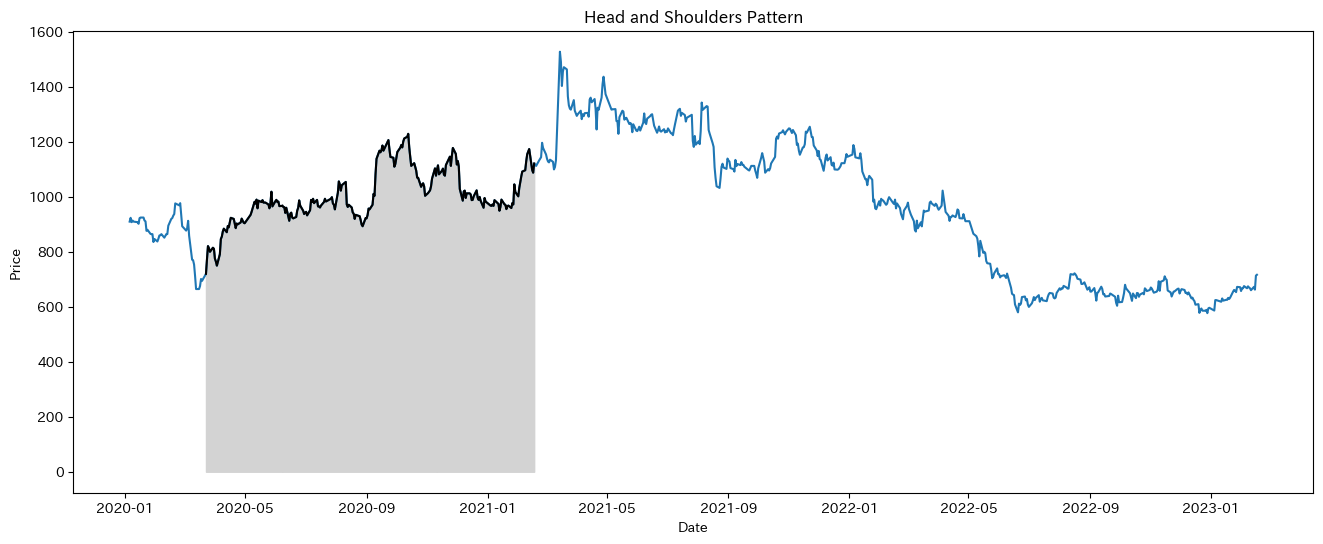

In [55]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()


# 関数を定義する
def plot_head_and_shoulders(df):
    # プロットする
    fig, ax = plt.subplots(figsize=(16,6))
    ax.plot(df['Adj Close'], label='Price')
    
    # ヘッドアンドショルダーのパラメーター
    left_shoulder_start = '2020-03-23'
    left_shoulder_end = '2020-06-08'
    head_start = '2020-06-08'
    head_end = '2020-11-11'
    right_shoulder_start = '2020-11-11'
    right_shoulder_end = '2021-02-17'

    # パターンの線をプロットする
    ax.plot(df.loc[left_shoulder_start:left_shoulder_end, 'Adj Close'], color='black')
    ax.plot(df.loc[head_start:head_end, 'Adj Close'], color='black')
    ax.plot(df.loc[right_shoulder_start:right_shoulder_end, 'Adj Close'], color='black')
    
    # パターンのエリアを塗りつぶす
    ax.fill_between(df.loc[left_shoulder_start:left_shoulder_end].index, df.loc[left_shoulder_start:left_shoulder_end, 'Adj Close'], color='lightgray')
    ax.fill_between(df.loc[head_start:head_end].index, df.loc[head_start:head_end, 'Adj Close'], color='lightgray')
    ax.fill_between(df.loc[right_shoulder_start:right_shoulder_end].index, df.loc[right_shoulder_start:right_shoulder_end, 'Adj Close'], color='lightgray')
    
    # タイトル、ラベルを設定する
    plt.title('Head and Shoulders Pattern')
    plt.xlabel('Date')
    plt.ylabel('Price')
    
    # プロットを表示する
    plt.show()

# 関数を呼び出す
plot_head_and_shoulders(df)

#### フィボナッチリトレースメント

[*********************100%***********************]  1 of 1 completed


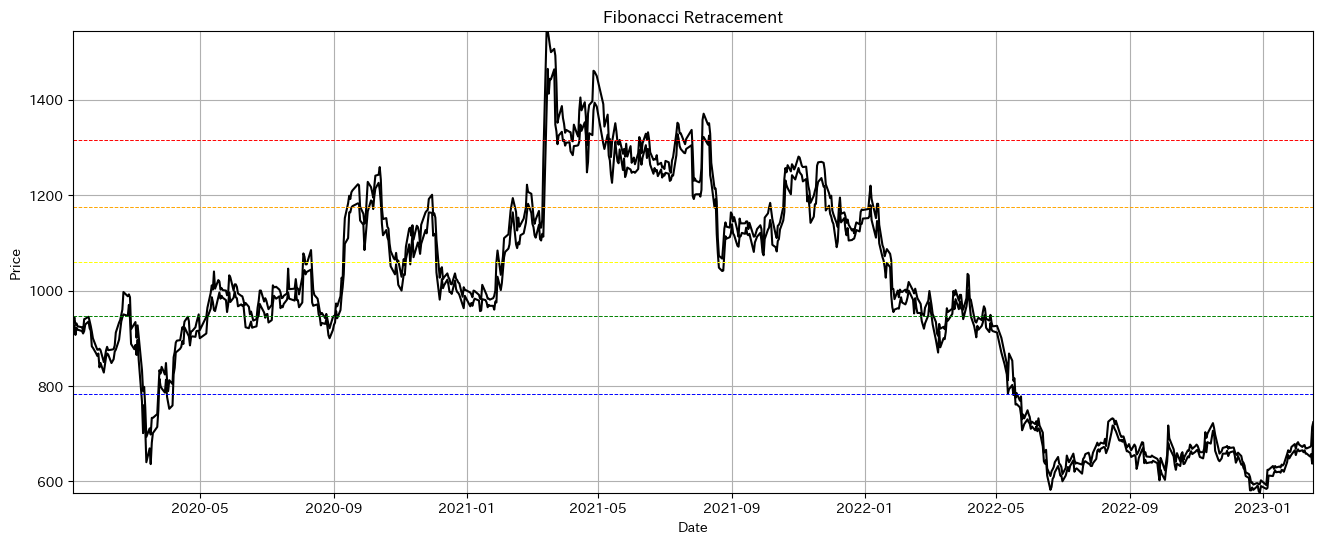

In [58]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# フィボナッチリトレースメントの描画関数
def fibonacci_retracement(data, low_col='Low', high_col='High', level=[0, 0.236, 0.382, 0.5, 0.618, 0.786, 1], 
                        color=['gray', 'red', 'orange', 'yellow', 'green', 'blue', 'purple']):
    max_val = data[high_col].max()
    min_val = data[low_col].min()
    diff = max_val - min_val
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(data.index, data[high_col], color='black', linewidth=1.5)
    ax.plot(data.index, data[low_col], color='black', linewidth=1.5)
    for i in range(len(level)):
        ax.axhline(max_val - diff * level[i], color=color[i], linestyle='--', linewidth=0.7)
    ax.set_xlim(data.index[0], data.index[-1])
    ax.set_ylim(min_val, max_val)
    ax.set_title('Fibonacci Retracement')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.grid()
    plt.show()

# フィボナッチリトレースメントの描画
fibonacci_retracement(df)

#### デマンドゾーン

[*********************100%***********************]  1 of 1 completed


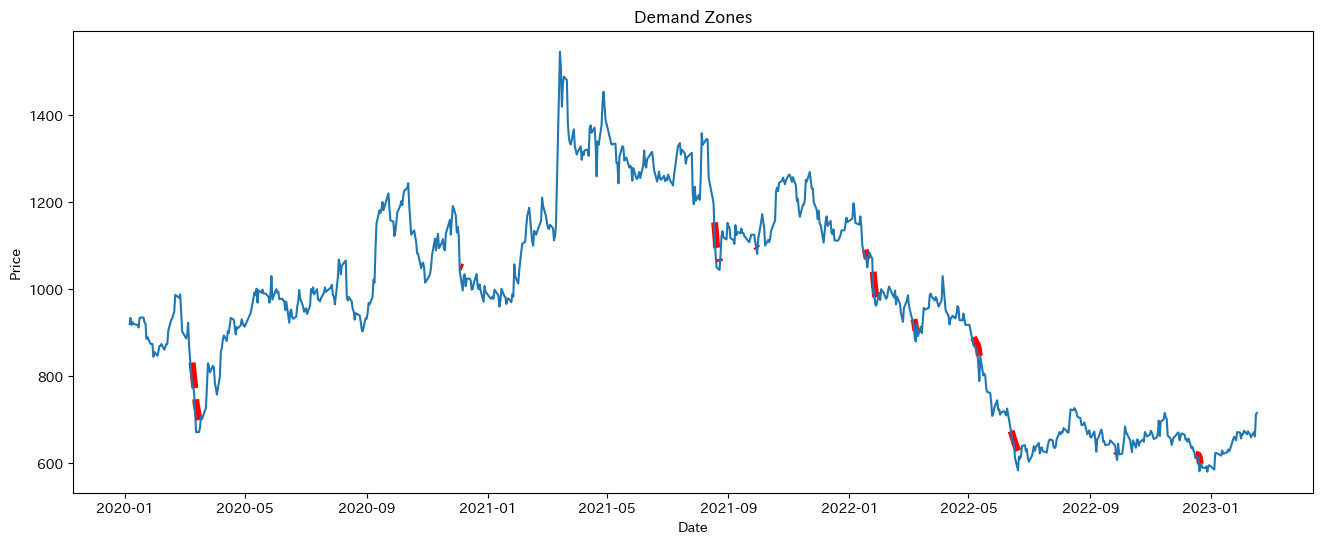

In [60]:
start = '2020-01-01'
end = '2023-02-17'
ticker = '4755.T'

# 楽天の株価の履歴データを取得（3年間分）
rakuten = yf.download(tickers=ticker, start=start, end=end)
df = rakuten.copy()

# デマンドゾーンをプロットする関数の定義
def plot_demand_zones(data, window_size=20, threshold=2):
    # データのクローンを作成
    df = data.copy()
    # デマンドゾーンの値を保持するための空のリストを作成
    demand_zones = []
    # 指定されたウィンドウサイズの移動平均を計算
    ma = df['Close'].rolling(window_size).mean()
    # 標準偏差を計算
    std = df['Close'].rolling(window_size).std()
    # デマンドゾーンの計算
    for i in range(window_size, len(df)):
        if df['Close'][i] < (ma[i - 1] - threshold * std[i - 1]):
            demand_zones.append(ma[i - 1] - threshold * std[i - 1])
        else:
            demand_zones.append(None)
    # デマンドゾーンをプロット
    plt.plot(df.index[window_size:], demand_zones, linestyle='--', linewidth=5, color='red')
    plt.title('Demand Zones')
    plt.xlabel('Date')
    plt.ylabel('Price')

# プロット
plt.figure(figsize=(16, 6))
plot_demand_zones(df)
plt.plot(df.index, df['Close'])
plt.show()

上記のコードは、指定されたウィンドウサイズ内で標準偏差のしきい値を下回った場合にデマンドゾーンを計算します。<br>デマンドゾーンの値が計算されたら、プロットを行い、価格チャートとともに表示されます。

これらのように自由度高くテクニカル指標を可視化できるのがmatplotlibです。<br>
細かなコードを書くことができるとファイナンス以外でも活躍の幅が広がります。ぜひ、matplotlibの基礎を習得されてください。<br>
しかしながら、毎回これだけのコードを書くのは大変なので、便利なライブラリがあります。<br>
**talib**と**mplfinance**です。<br>
これ以降の講座では上記のライブラリを用いて、簡単に可視化をしながら分析にも入っていきたいと思います。<br>
引き続きよろしくお願いします。